## VAR model

In [1]:
import statsmodels.api as sm

macro_econ_data = sm.datasets.macrodata.load_pandas().data
macro_econ_data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


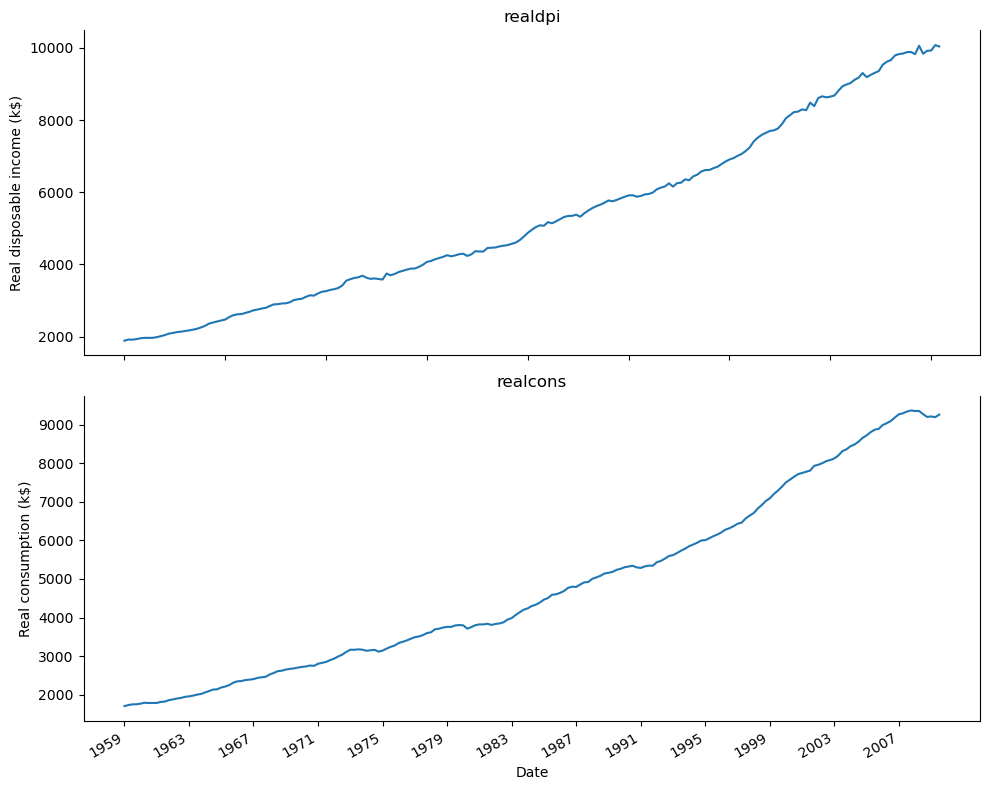

In [2]:
import matplotlib.pyplot as plt
import numpy as np


fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

ax1.plot(macro_econ_data["realdpi"])
ax1.set_xlabel("Date")
ax1.set_ylabel("Real disposable income (k$)")
ax1.set_title("realdpi")
ax1.spines["top"].set_alpha(0)

ax2.plot(macro_econ_data["realcons"])
ax2.set_xlabel("Date")
ax2.set_ylabel("Real consumption (k$)")
ax2.set_title("realcons")
ax2.spines["top"].set_alpha(0)

plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4))

fig.autofmt_xdate()
plt.tight_layout()

In [3]:
from statsmodels.tsa.stattools import adfuller

ad_fuller_test_realdpi = adfuller(macro_econ_data["realdpi"])
print(f"ADF stats for realdpi: {ad_fuller_test_realdpi[0]}")
print(f"p-value for realdpi: {ad_fuller_test_realdpi[1]}\n----------------------")

ad_fuller_test_realcons = adfuller(macro_econ_data["realcons"])
print(f"ADF stats for realcons: {ad_fuller_test_realcons[0]}")
print(f"p-value for realcons: {ad_fuller_test_realcons[1]}")

ADF stats for realdpi: 2.986025351954689
p-value for realdpi: 1.0
----------------------
ADF stats for realcons: 1.5499123380509592
p-value for realcons: 0.9976992503412904


In [4]:
ad_fuller_test_realdpi = adfuller(macro_econ_data["realdpi"].diff()[1:])
print(f"ADF stats for realdpi diff: {ad_fuller_test_realdpi[0]}")
print(f"p-value for realdpi diff: {ad_fuller_test_realdpi[1]}\n----------------------")

ad_fuller_test_realcons = adfuller(macro_econ_data["realcons"].diff()[1:])
print(f"ADF stats for realcons diff: {ad_fuller_test_realcons[0]}")
print(f"p-value for realcons diff: {ad_fuller_test_realcons[1]}")

ADF stats for realdpi diff: -8.864893340673008
p-value for realdpi diff: 1.4493606159108096e-14
----------------------
ADF stats for realcons diff: -4.204306080845246
p-value for realcons diff: 0.0006479282158627595


In [5]:
from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.varmax import VARMAX
import pandas as pd


def optimize_VAR(endog: Union[pd.Series, list]) -> pd.DataFrame:

    results = []

    for i in tqdm(range(15)):
        try:
            model = VARMAX(endog, order=(i, 0)).fit(dips=False)
        
        except:
            continue

        aic = model.aic
        results.append([i, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ["p", "AIC"]

    result_df = result_df.sort_values(by="AIC", ascending=True).reset_index(drop=True)

    return result_df


In [6]:
endog = macro_econ_data[["realdpi", "realcons"]]

endog_diff = macro_econ_data[["realdpi", "realcons"]].diff()[1:]

train = endog_diff[:162]
test = endog_diff[162:]

result_df = optimize_VAR(train)
result_df

  0%|          | 0/15 [00:00<?, ?it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.61849D+00    |proj g|=  2.88206D-03

At iterate    5    f=  9.61847D+00    |proj g|=  2.89230D-03

At iterate   10    f=  9.61834D+00    |proj g|=  3.17855D-03

At iterate   15    f=  9.61833D+00    |proj g|=  2.08529D-03

At iterate   20    f=  9.61831D+00    |proj g|=  7.03839D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     21     25      1     0     0   7.094D-05   9.618D+00
  F =   9.6183127883783381     

CONVERG

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a futur


At iterate    5    f=  9.58112D+00    |proj g|=  2.53872D-03

At iterate   10    f=  9.58065D+00    |proj g|=  4.18748D-03

At iterate   15    f=  9.58061D+00    |proj g|=  7.55432D-04

At iterate   20    f=  9.58056D+00    |proj g|=  3.53041D-03

At iterate   25    f=  9.58054D+00    |proj g|=  3.50857D-04

At iterate   30    f=  9.58053D+00    |proj g|=  1.10887D-03

At iterate   35    f=  9.58053D+00    |proj g|=  1.02912D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     36     42      1     0     0   6.949D-05   9.581D+00
  F =   9.5805298409247115     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   20    f=  9.53427D+00    |proj g|=  6.00975D-03

At iterate   25    f=  9.53419D+00    |proj g|=  2.10890D-04

At iterate   30    f=  9.53418D+00    |proj g|=  6.56354D-04

At iterate   35    f=  9.53417D+00    |proj g|=  2.58453D-04

At iterate   40    f=  9.53417D+00    |proj g|=  6.81242D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     41     47      1     0     0   6.626D-05   9.534D+00
  F =   9.5341669199704668     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   15    f=  9.52872D+00    |proj g|=  1.19734D-03

At iterate   20    f=  9.52848D+00    |proj g|=  6.53572D-03

At iterate   25    f=  9.52841D+00    |proj g|=  3.15852D-04

At iterate   30    f=  9.52840D+00    |proj g|=  2.43445D-04

At iterate   35    f=  9.52839D+00    |proj g|=  1.11717D-03

At iterate   40    f=  9.52838D+00    |proj g|=  4.73170D-04

At iterate   45    f=  9.52838D+00    |proj g|=  8.60831D-05

At iterate   50    f=  9.52838D+00    |proj g|=  3.36106D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     55      1     0     0   3.361D-04   9.528D+00
  F =   9.52837668031

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will r


At iterate    5    f=  9.49065D+00    |proj g|=  3.71658D-03

At iterate   10    f=  9.48825D+00    |proj g|=  2.28029D-02

At iterate   15    f=  9.48729D+00    |proj g|=  1.02704D-03

At iterate   20    f=  9.48716D+00    |proj g|=  6.60103D-03

At iterate   25    f=  9.48680D+00    |proj g|=  6.00195D-04

At iterate   30    f=  9.48679D+00    |proj g|=  7.33787D-04

At iterate   35    f=  9.48679D+00    |proj g|=  8.50849D-04

At iterate   40    f=  9.48676D+00    |proj g|=  1.74256D-03

At iterate   45    f=  9.48675D+00    |proj g|=  1.30278D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     45     52   

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  9.47727D+00    |proj g|=  4.35159D-03

At iterate   10    f=  9.47491D+00    |proj g|=  2.97492D-02

At iterate   15    f=  9.47252D+00    |proj g|=  1.25347D-03

At iterate   20    f=  9.47249D+00    |proj g|=  2.06328D-03

At iterate   25    f=  9.47196D+00    |proj g|=  8.01727D-03

At iterate   30    f=  9.47183D+00    |proj g|=  4.76210D-04

At iterate   35    f=  9.47182D+00    |proj g|=  1.12519D-03

At iterate   40    f=  9.47181D+00    |proj g|=  1.76898D-03

At iterate   45    f=  9.47179D+00    |proj g|=  1.36099D-03

At iterate   50    f=  9.47178D+00    |proj g|=  8.89821D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will r


At iterate    5    f=  9.47478D+00    |proj g|=  5.08595D-03

At iterate   10    f=  9.47087D+00    |proj g|=  2.26392D-02

At iterate   15    f=  9.46827D+00    |proj g|=  1.86586D-03

At iterate   20    f=  9.46823D+00    |proj g|=  1.91934D-03

At iterate   25    f=  9.46766D+00    |proj g|=  1.74489D-02

At iterate   30    f=  9.46737D+00    |proj g|=  1.13672D-03

At iterate   35    f=  9.46733D+00    |proj g|=  2.54327D-03

At iterate   40    f=  9.46732D+00    |proj g|=  4.80053D-04

At iterate   45    f=  9.46729D+00    |proj g|=  1.56594D-03

At iterate   50    f=  9.46728D+00    |proj g|=  5.39076D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will r

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           37     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.46504D+00    |proj g|=  4.42335D-02

At iterate    5    f=  9.46428D+00    |proj g|=  5.80453D-03

At iterate   10    f=  9.46011D+00    |proj g|=  5.15624D-02

At iterate   15    f=  9.45574D+00    |proj g|=  5.77425D-03

At iterate   20    f=  9.45555D+00    |proj g|=  1.68747D-03

At iterate   25    f=  9.45505D+00    |proj g|=  2.55603D-02

At iterate   30    f=  9.45428D+00    |proj g|=  6.93935D-04

At iterate   35    f=  9.45427D+00    |proj g|=  1.82431D-03

At iterate   40    f=  9.45417D+00    |proj g|=  2.72251D-03

At iterate   45    f=  9.45416D+00    |proj g|=  3.12994D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           41     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.45353D+00    |proj g|=  5.78193D-02

At iterate    5    f=  9.45232D+00    |proj g|=  6.38271D-03

At iterate   10    f=  9.44644D+00    |proj g|=  4.04969D-02

At iterate   15    f=  9.44123D+00    |proj g|=  7.94196D-03

At iterate   20    f=  9.44106D+00    |proj g|=  1.85465D-03

At iterate   25    f=  9.44073D+00    |proj g|=  1.38197D-02

At iterate   30    f=  9.43957D+00    |proj g|=  3.90621D-03

At iterate   35    f=  9.43951D+00    |proj g|=  2.84469D-03

At iterate   40    f=  9.43944D+00    |proj g|=  1.22633D-03

At iterate   45    f=  9.43944D+00    |proj g|=  8.90676D-04


/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will r


At iterate   50    f=  9.43940D+00    |proj g|=  3.79665D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   41     50     60      1     0     0   3.797D-03   9.439D+00
  F =   9.4394048637849561     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           45     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.45560D+00    |proj g|=  5.40566D-02

At iterate    5    f=  9.45433D+00    |proj g|=  7.10478D-03

At iterate   10    f=  9.44765D+00    |proj g|=  5.61136D-02

At iter

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will r


At iterate   50    f=  9.43777D+00    |proj g|=  1.53508D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   45     50     56      1     0     0   1.535D-03   9.438D+00
  F =   9.4377746885865577     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           49     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.45195D+00    |proj g|=  5.62485D-02

At iterate    5    f=  9.45066D+00    |proj g|=  7.75022D-03

At iterate   10    f=  9.44280D+00    |proj g|=  4.86368D-02

At iter

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will r


At iterate   50    f=  9.43042D+00    |proj g|=  6.94065D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   49     50     56      1     0     0   6.941D-04   9.430D+00
  F =   9.4304164198452529     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           53     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.44479D+00    |proj g|=  5.90407D-02

At iterate    5    f=  9.44350D+00    |proj g|=  8.47563D-03

At iterate   10    f=  9.43594D+00    |proj g|=  7.22625D-02

At iter

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will r


At iterate   50    f=  9.41884D+00    |proj g|=  9.97685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   53     50     57      1     0     0   9.977D-04   9.419D+00
  F =   9.4188389020273426     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           57     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.44502D+00    |proj g|=  6.32966D-02

At iterate    5    f=  9.44359D+00    |proj g|=  9.20343D-03

At iterate   10    f=  9.43572D+00    |proj g|=  6.09596D-02

At iter

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will r


At iterate   50    f=  9.41388D+00    |proj g|=  1.58153D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   57     50     58      1     0     0   1.582D-03   9.414D+00
  F =   9.4138783561536030     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           61     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.43457D+00    |proj g|=  5.90786D-02


 This problem is unconstrained.



At iterate    5    f=  9.43308D+00    |proj g|=  1.01136D-02

At iterate   10    f=  9.42938D+00    |proj g|=  3.46586D-02

At iterate   15    f=  9.41121D+00    |proj g|=  5.62185D-02

At iterate   20    f=  9.40522D+00    |proj g|=  3.44055D-02

At iterate   25    f=  9.40284D+00    |proj g|=  1.18682D-02

At iterate   30    f=  9.40268D+00    |proj g|=  3.17947D-03

At iterate   35    f=  9.40192D+00    |proj g|=  1.39511D-02

At iterate   40    f=  9.39858D+00    |proj g|=  1.46446D-02

At iterate   45    f=  9.39821D+00    |proj g|=  1.29777D-03

At iterate   50    f=  9.39819D+00    |proj g|=  1.32253D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,p,AIC
0,3,3123.070082
1,5,3123.708523
2,6,3126.855595
3,4,3129.194044
4,2,3130.091668
5,7,3133.398315
6,1,3134.333343
7,8,3137.149015
8,9,3140.367176
9,10,3147.838999


In [7]:
from statsmodels.tsa.stattools import grangercausalitytests

granger_cons_dpi = grangercausalitytests(macro_econ_data[["realdpi", "realcons"]].diff()[1:], [3])
granger_dpi_cons = grangercausalitytests(macro_econ_data[["realcons", "realdpi"]].diff()[1:], [3])




Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.2363  , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=28.7191 , p=0.0000  , df=3
likelihood ratio test: chi2=26.8268 , p=0.0000  , df=3
parameter F test:         F=9.2363  , p=0.0000  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8181  , p=0.0403  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=8.7625  , p=0.0326  , df=3
likelihood ratio test: chi2=8.5751  , p=0.0355  , df=3
parameter F test:         F=2.8181  , p=0.0403  , df_denom=192, df_num=3


In [8]:
best_model = VARMAX(train, order=(3, 0))
best_model_fit = best_model.fit(disp=False)

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")


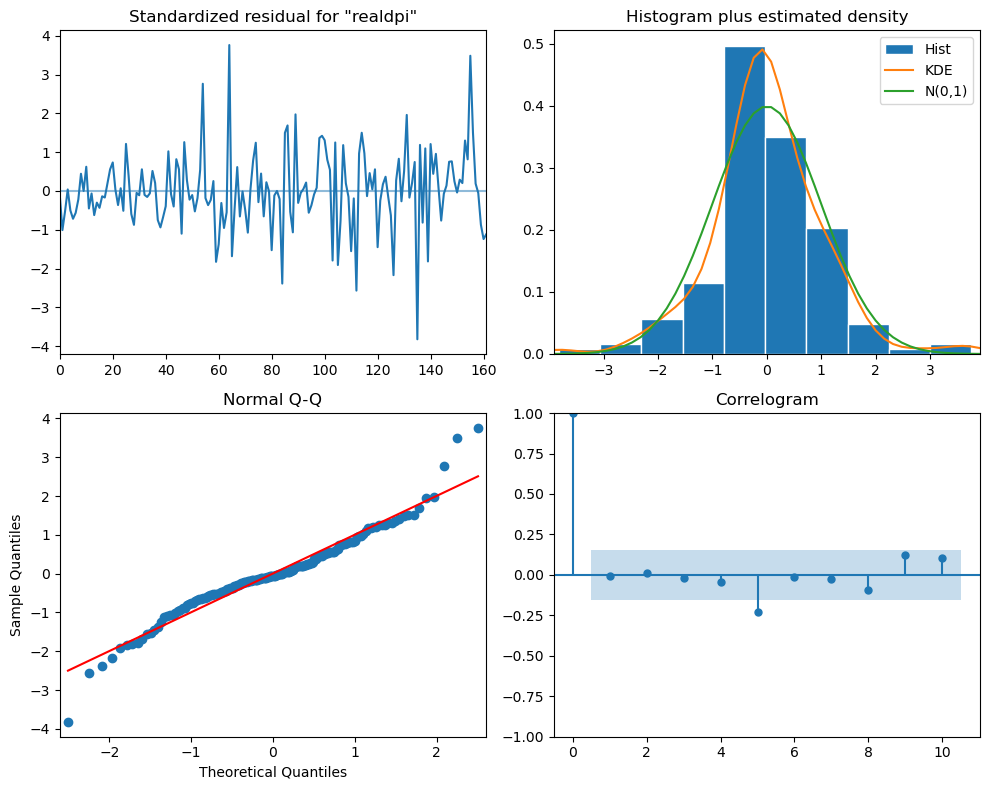

In [9]:
best_model_fit.plot_diagnostics(figsize=(10, 8), variable=0)
plt.tight_layout()

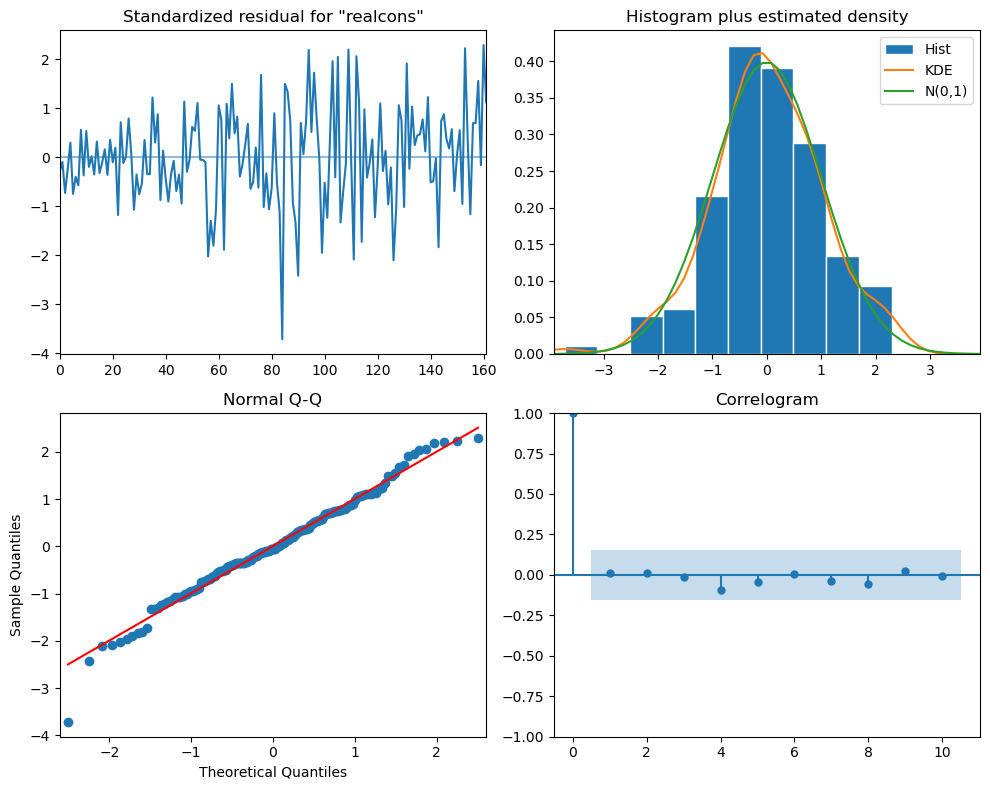

In [10]:
best_model_fit.plot_diagnostics(figsize=(10, 8), variable=1)
plt.tight_layout()

In [11]:
from statsmodels.stats.diagnostic import acorr_ljungbox

realgdp_residuals = best_model_fit.resid["realdpi"]
ljungbox_df = acorr_ljungbox(realgdp_residuals, np.arange(1, 11, 1))

ljungbox_df

,lb_stat,lb_pvalue
1,0.011641,0.914078
2,0.029400,0.985408
3,0.075829,0.994571
4,0.377929,0.984244
5,9.142497,0.103514
6,9.165332,0.164491
7,9.270079,0.233843
8,10.811512,0.212610
9,13.318051,0.148735
10,15.287303,0.121933


In [13]:
realcons_residuals = best_model_fit.resid["realcons"]
ljungbox_cons_df = acorr_ljungbox(realcons_residuals, np.arange(1, 11, 1))

ljungbox_cons_df

,lb_stat,lb_pvalue
1,0.023877,0.877199
2,0.068715,0.966226
3,0.068792,0.995299
4,0.235719,0.993577
5,0.377772,0.995920
6,0.787312,0.992410
7,1.015247,0.994579
8,2.150382,0.976051
9,2.437078,0.982528
10,2.442743,0.991684


In [14]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon
    end_idx = train_len

    if method == "VAR":

        realdpi_pred_VAR = []
        realcons_pred_VAR = []

        for i in range(train_len, total_len, window):
            model = VARMAX(df[:i], order=(3, 0))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)

            oos_pred_realdpi = predictions.predicted_mean.iloc[-window:]["realdpi"]
            oos_pred_realcons = predictions.predicted_mean.iloc[-window:]["realcons"]

            realdpi_pred_VAR.extend(oos_pred_realdpi)
            realcons_pred_VAR.extend(oos_pred_realcons)

        return realdpi_pred_VAR, realcons_pred_VAR
    
    elif method == "last":
        realdpi_pred_last = []
        realcons_pred_last = []

        for i in range(train_len, total_len, window):

            realdpi_last = df[:i].iloc[-1]["realdpi"]
            realcons_last = df[:i].iloc[-1]["realcons"]

            realdpi_pred_last.extend(realdpi_last for _ in range(window))
            realcons_pred_last.extend(realcons_last for _ in range(window))

        return realdpi_pred_last, realcons_pred_last

In [15]:
TRAIN_LEN = len(train)
HORIZON = len(test)

WINDOW = 4

realdpi_pred_VAR, realcons_pred_VAR = rolling_forecast(endog_diff, TRAIN_LEN, HORIZON, WINDOW, "VAR")

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.11/site-packages/statsmodels/tsa/statespace/varmax.py:326: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  endog = np.require(endog.fillna(method='backfill'), requirements="W")
/home/alexa/miniconda3/envs/timeseriesML

In [16]:
test = endog[163:]

test["realdpi_pred_VAR"] = pd.Series()
test["realdpi_pred_VAR"] = endog.iloc[162]["realdpi"] + np.cumsum(realdpi_pred_VAR)

test["realcons_pred_VAR"] = pd.Series()
test["realcons_pred_VAR"] = endog.iloc[162]["realcons"] + np.cumsum(realcons_pred_VAR)

test

/tmp/ipykernel_109745/3060353192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["realdpi_pred_VAR"] = pd.Series()
/tmp/ipykernel_109745/3060353192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["realdpi_pred_VAR"] = endog.iloc[162]["realdpi"] + np.cumsum(realdpi_pred_VAR)
/tmp/ipykernel_109745/3060353192.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,realdpi,realcons,realdpi_pred_VAR,realcons_pred_VAR
163,7887.7,7389.2,7829.222186,7354.322994
164,8053.4,7501.3,7897.185023,7430.252053
165,8135.9,7571.8,7960.558315,7496.624960
166,8222.3,7645.9,8014.750371,7556.608949
167,8234.6,7713.5,8080.699041,7630.993747
168,8296.5,7744.3,8142.391756,7692.844861
169,8273.7,7773.5,8200.126019,7753.867491
170,8484.5,7807.7,8259.368313,7812.539131
171,8385.5,7930.0,8264.392293,7864.639721
172,8611.6,7957.3,8320.864619,7895.064458


In [29]:
realdpi_pred_last, realcons_pred_last = rolling_forecast(endog, TRAIN_LEN, HORIZON, WINDOW, "last")

test["realdpi_pred_last"] = realdpi_pred_last
test["realcons_pred_last"] = realcons_pred_last

test

/tmp/ipykernel_109745/3213540014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["realdpi_pred_last"] = realdpi_pred_last
/tmp/ipykernel_109745/3213540014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["realcons_pred_last"] = realcons_pred_last


,realdpi,realcons,realdpi_pred_VAR,realcons_pred_VAR,realdpi_pred_last,realcons_pred_last
163,7887.7,7389.2,7829.222186,7354.322994,7716.0,7199.9
164,8053.4,7501.3,7897.185023,7430.252053,7716.0,7199.9
165,8135.9,7571.8,7960.558315,7496.624960,7716.0,7199.9
166,8222.3,7645.9,8014.750371,7556.608949,7716.0,7199.9
167,8234.6,7713.5,8080.699041,7630.993747,8135.9,7571.8
168,8296.5,7744.3,8142.391756,7692.844861,8135.9,7571.8
169,8273.7,7773.5,8200.126019,7753.867491,8135.9,7571.8
170,8484.5,7807.7,8259.368313,7812.539131,8135.9,7571.8
171,8385.5,7930.0,8264.392293,7864.639721,8273.7,7773.5
172,8611.6,7957.3,8320.864619,7895.064458,8273.7,7773.5


In [26]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [30]:
mape_realdpi_VAR = mape(test['realdpi'], test['realdpi_pred_VAR'])
mape_realdpi_last = mape(test['realdpi'], test['realdpi_pred_last'])

mape_realcons_VAR = mape(test['realcons'], test['realcons_pred_VAR'])
mape_realcons_last = mape(test['realcons'], test['realcons_pred_last'])

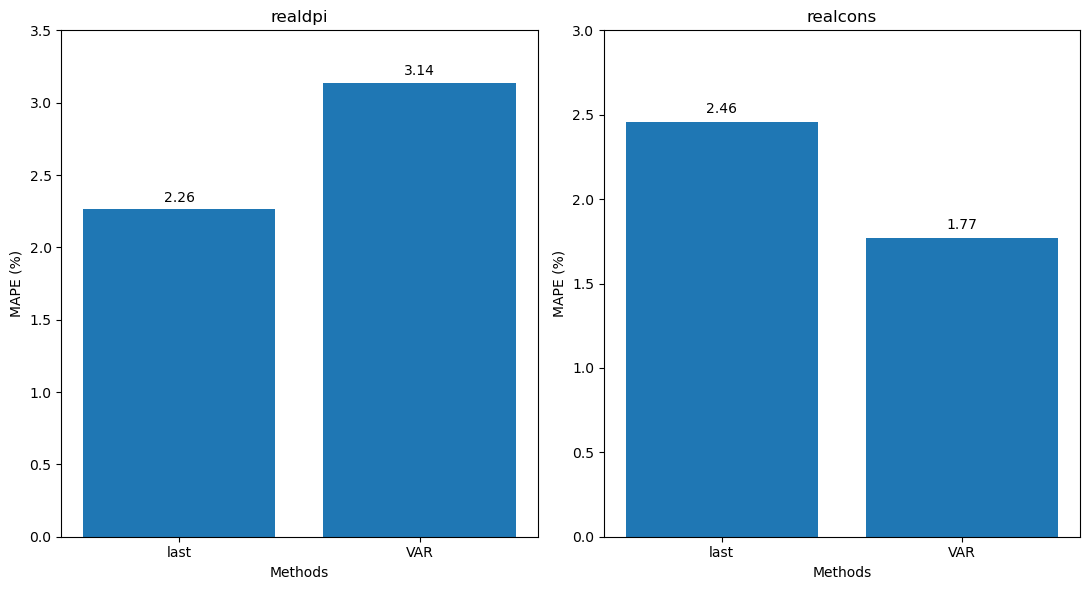

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))

x = ['last', 'VAR']
y1 = [mape_realdpi_last, mape_realdpi_VAR]
y2 = [mape_realcons_last, mape_realcons_VAR]

ax1.bar(x, y1)
ax1.set_xlabel('Methods')
ax1.set_ylabel('MAPE (%)')
ax1.set_title('realdpi')
ax1.set_ylim(0, 3.5)

ax2.bar(x,y2)
ax2.set_xlabel('Methods')
ax2.set_ylabel('MAPE (%)')
ax2.set_title('realcons')
ax2.set_ylim(0, 3)

for index, value in enumerate(y1):
    ax1.text(x=index, y=value + 0.05, s=str(round(value,2)), ha='center')
    
for index, value in enumerate(y2):
    ax2.text(x=index, y=value + 0.05, s=str(round(value,2)), ha='center')

plt.tight_layout()